In [2]:
suppressMessages(suppressWarnings(source("config.R")))

In [3]:
cat(FD_BASE, "\n")
cat(FD_WRK,  "\n")

/work/kk319 
/work/kk319/out/CombEffect_STARR 


In [4]:
FD_DAT=file.path(FD_WRK, "bootstrap")

In [5]:
idn_samples = c(
    paste0("Input", 1:5),
    paste0("TFX", 2:5, "_DMSO"),
    paste0("TFX", 2:5, "_Dex"))
idn_samples

[1] "Input1"    "Input2"    "Input3"    "Input4"    "Input5"    "TFX2_DMSO"
 [7] "TFX3_DMSO" "TFX4_DMSO" "TFX5_DMSO" "TFX2_Dex"  "TFX3_Dex"  "TFX4_Dex" 
[13] "TFX5_Dex"

In [ ]:
idn_samples = paste0("Input", 1:5)
lst = lapply(idn_samples, function(idn_sample){
    fdiry=file.path(FD_DAT, idn_sample)
    fname="*_cov.txt"
    fpaths=Sys.glob(file.path(fdiry, fname))
    
    tmp = lapply(fpaths, function(fpath){
        idn = str_match(string = fpath, pattern="(B.*)_cov")[1,2]
        idn = paste(idn_sample, idn, sep="_")
        print(idn)
    })
})

In [25]:
idn_samples = paste0("Input", 1:5)
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Depth")

lst_dat = lapply(idn_samples, function(idn_sample){
    fdiry=file.path(FD_DAT, idn_sample)
    fname="*_cov.txt"
    fpaths=Sys.glob(file.path(fdiry, fname))
    
    tmp = lapply(fpaths, function(fpath){
        idn = str_match(string = fpath, pattern="(B.*)_cov")[1,2]
        idn = paste(idn_sample, idn, sep="_")
        
        dat = read_tsv(
            fpath, 
            col_types=ctypes, 
            col_names=cnames, 
            skip = 8148000, 
            n_max=15000)
        dat = dat %>% mutate(SID = idn_sample, Sample = idn)
        return(dat)
    })
    
    tmp = bind_rows(tmp)
    return(tmp)
})

In [26]:
lst_dat[[1]] %>% head

Chrom,Loc,Depth,Sample
chr17,8148001,0,Input1_B10
chr17,8148002,0,Input1_B10
chr17,8148003,0,Input1_B10
chr17,8148004,0,Input1_B10
chr17,8148005,0,Input1_B10
chr17,8148006,0,Input1_B10


In [27]:
lst_dat[[1]] %>% tail

Chrom,Loc,Depth,Sample
chr17,8162995,0,Input1_B9
chr17,8162996,0,Input1_B9
chr17,8162997,0,Input1_B9
chr17,8162998,0,Input1_B9
chr17,8162999,0,Input1_B9
chr17,8163000,0,Input1_B9


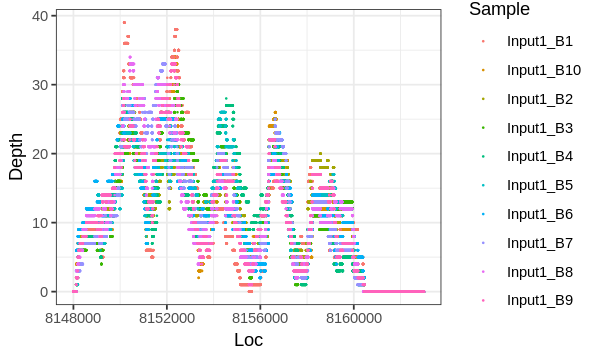

In [29]:
options(repr.plot.height=3, repr.plot.width=5)
ggplot(lst_dat[[1]], aes(x=Loc, y=Depth, color=Sample)) + geom_point(size=0.1) + theme_bw()

In [30]:
idn_samples = paste0("TFX", 2:5, "_Dex")
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Depth")

lst_dat_dex = lapply(idn_samples, function(idn_sample){
    fdiry=file.path(FD_DAT, idn_sample)
    fname="*_cov.txt"
    fpaths=Sys.glob(file.path(fdiry, fname))
    
    tmp = lapply(fpaths, function(fpath){
        idn = str_match(string = fpath, pattern="(B.*)_cov")[1,2]
        idn = paste(idn_sample, idn, sep="_")
        
        dat = read_tsv(
            fpath, 
            col_types=ctypes, 
            col_names=cnames, 
            skip = 8148000, 
            n_max=15000)
        dat = dat %>% mutate(Sample = idn_sample, SID = idn)
        return(dat)
    })
    
    tmp = bind_rows(tmp)
    return(tmp)
})

In [31]:
dat = bind_rows(lst_dat_dex)

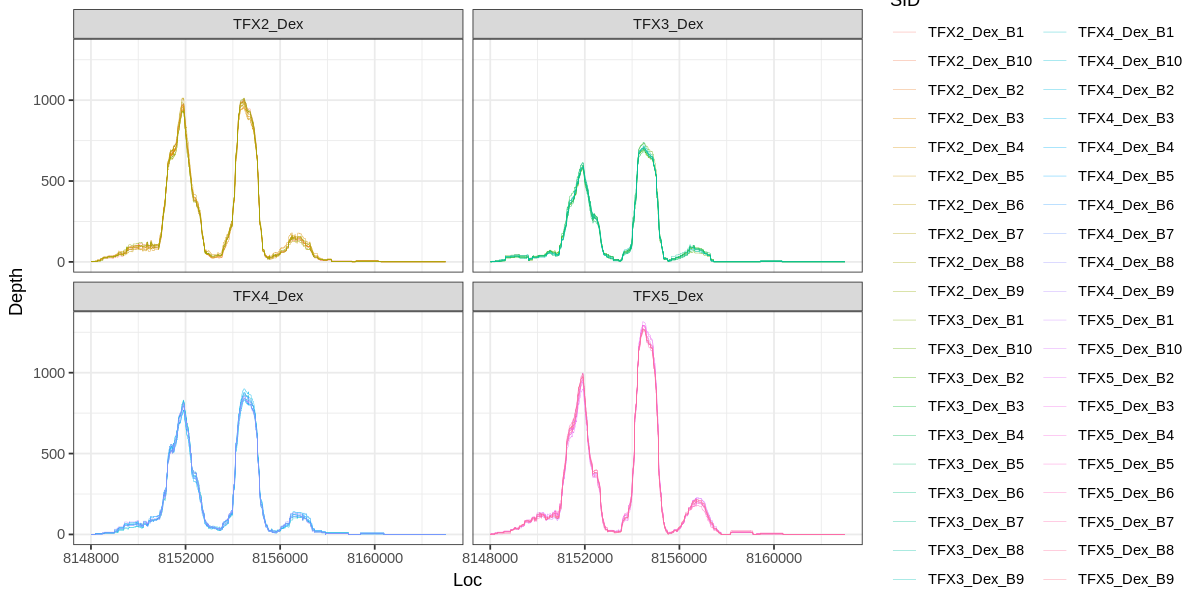

In [39]:
options(repr.plot.height=5, repr.plot.width=10)
ggplot(dat, aes(x=Loc, y=Depth, color=SID)) + geom_line(size=0.1) + theme_bw() + facet_wrap(~Sample)

In [22]:
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Depth")

fpath = "/work/kk319/out/CombEffect_STARR/bootstrap/Input1//target_PER1_B1_cov.txt"
dat = read_tsv(fpath, col_types=ctypes, col_names=cnames, skip = 8148000, n_max=15000)

In [23]:
str_match(string = fpath, pattern="(B.*)_cov")[1,2]

[1] "B1"

In [19]:
head(dat, 12200) %>% tail

Chrom,Loc,Depth
chr17,8160195,5
chr17,8160196,5
chr17,8160197,5
chr17,8160198,5
chr17,8160199,5
chr17,8160200,5
